<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/DVL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'14RfDnc5maSGzxripjhH3Z6B2asdpFbbX'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing
#https://drive.google.com/file/d/14RfDnc5maSGzxripjhH3Z6B2asdpFbbX/view?usp=sharing

In [0]:
downloaded.GetContentFile('data_crupted_Alhumdulliah.csv')

In [0]:
import pandas as pd
df2 = pd.read_csv('data_crupted_Alhumdulliah.csv') 
df2

In [0]:
df2["TRUE"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2

In [0]:
t=df2['Time']
T13data=df2['DVL4']
X13=np.array(T13data)
y13=df2['DVL4_S']
y13=np.array(y13)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X13, z13 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z12 = sequence[i:end_ix], sequence[end_ix]
		X13.append(seq_x)
		z13.append(seq_z12)
	return array(X13), array(z13)

In [0]:
scaled_data13=X13

In [11]:
X13

array([ 0.        ,  0.        , 20.        , ...,  0.31445754,
        0.31445754,  0.31445754])

In [12]:
X13.shape

(3005,)

In [0]:
# define input sequence
raw_seq13 = X13
# choose a number of time steps
n_steps = 10
# split into samples
X13, z13 = split_sequence(raw_seq13, n_steps)

In [0]:
X13, z13 = split_sequence(raw_seq13, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X13 = X13.reshape((X13.shape[0], X13.shape[1], n_features))

In [0]:
Label13=y13

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label13, y_13 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label13.append(seq_x)
		y_13.append(seq_y)
	return array(Label13), array(y_13)

In [0]:
raw_seq13 = Label13
# choose a number of time steps
n_steps = 10
# split into samples
Label13, y_13 = split_sequence(raw_seq13, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label13 = Label13.reshape((Label13.shape[0], Label13.shape[1], n_features))

In [18]:
y_13

array([5., 5., 5., ..., 5., 5., 5.])

In [0]:
X_train13  = np.array(X13[:2500])
y_train13 = np.array(y_13[:2500])

X_test13 = np.array(X13[-2500:])
y_test13 = np.array(y_13[-2500:])

In [20]:
print("X_train3 size: {}".format(X_train13.shape))
print("y_train3 size: {}".format(y_train13.shape))
print("X_test3 size: {}".format(X_test13.shape))
print("y_test3 size: {}".format(y_test13.shape))

X_train3 size: (2500, 10, 1)
y_train3 size: (2500,)
X_test3 size: (2500, 10, 1)
y_test3 size: (2500,)


In [0]:
dates = df2['Time']
train_date = dates[:2500]
test_date = dates[-2500:]

In [0]:
X3 = X_train13
y3 = y_train13

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X3, y3, epochs=20, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred3=[]
for i in X_test13:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred3.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

In [27]:
len(y_pred3)

2500

In [28]:
len(y_test13)

2500

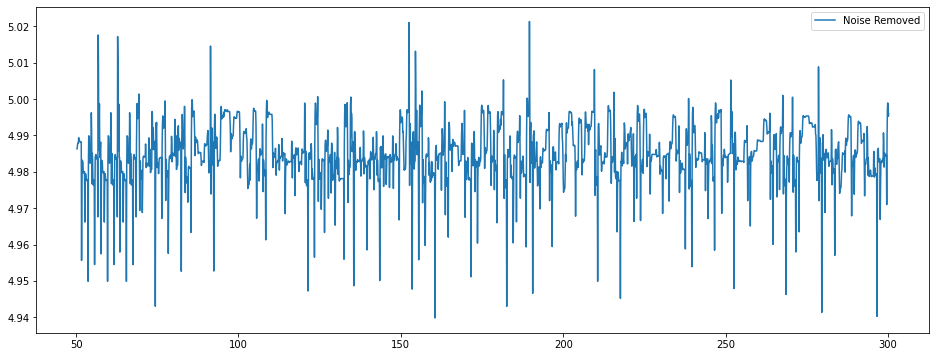

In [29]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred3,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [30]:
scaled_data13

array([ 0.        ,  0.        , 20.        , ...,  0.31445754,
        0.31445754,  0.31445754])

In [0]:
scaled_data13_2=scaled_data13[-2500:]

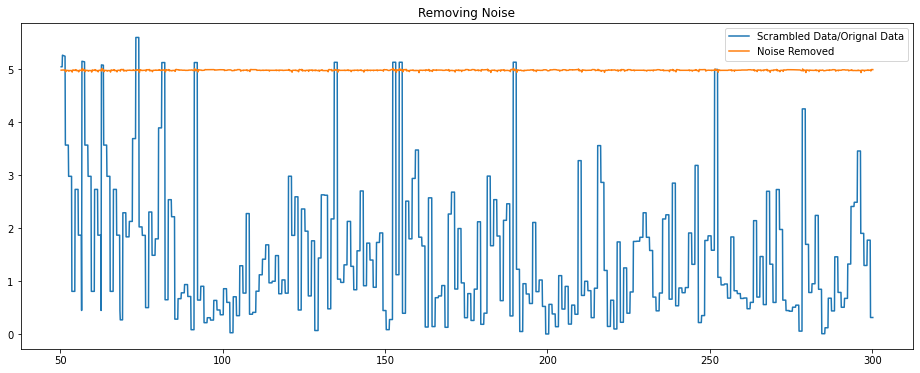

In [32]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data13_2, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred3,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

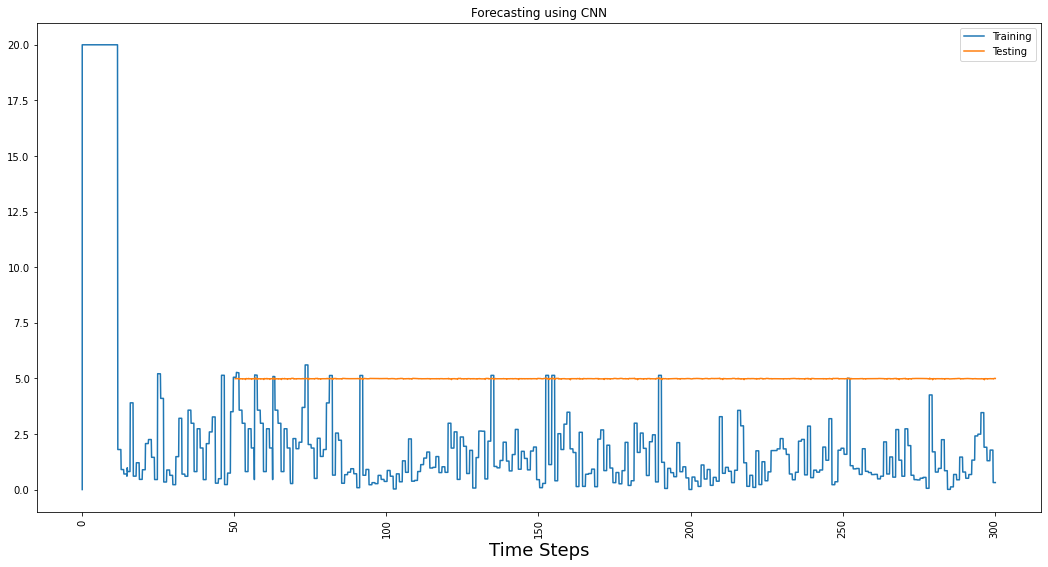

In [33]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data13,label="Training")
plt.plot(test_date,y_pred3,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()